[('Int-Txt/Amazon-int.txt', 51.48, 'Intermediate'), ('Ele-Txt/Amazon-ele.txt', 63.09, 'Elementary'), ('Adv-Txt/Amazon-adv.txt', 49.96, 'Advanced')]


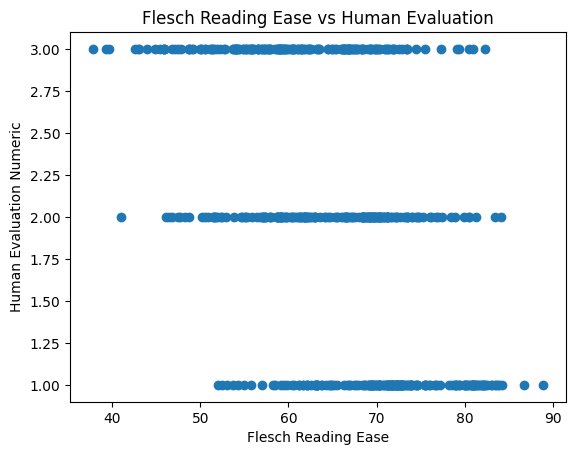

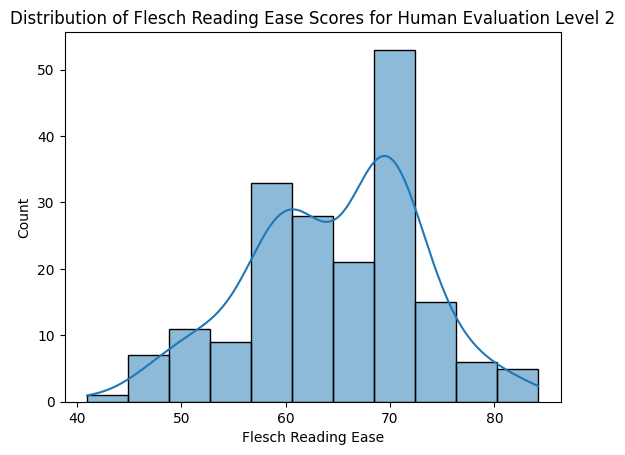

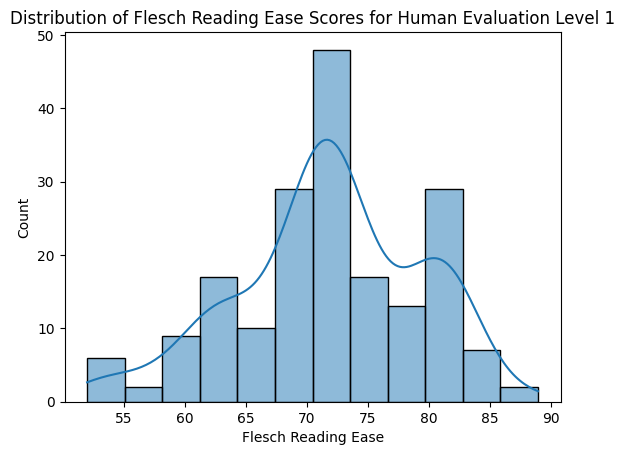

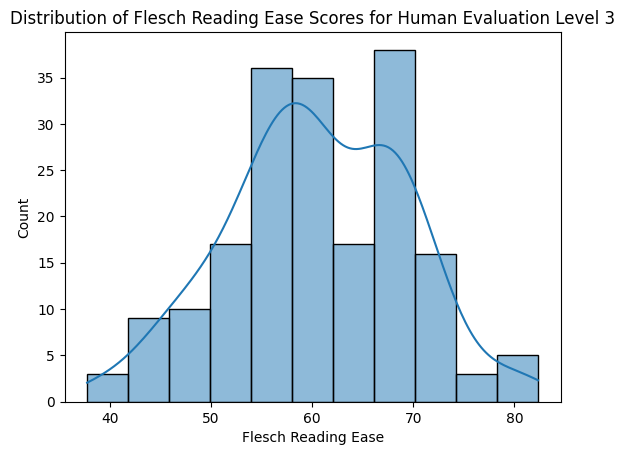

Pearson correlation: -0.49180637401274313, p-value: 7.220765733248962e-36


In [9]:
import os
import pandas as pd
import textstat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the root directory and the subdirectories with the corresponding human readability levels
root_dir = "Texts-SeparatedByReadingLevel"
directories = {
    "Int-Txt": "Intermediate",
    "Ele-Txt": "Elementary",
    "Adv-Txt": "Advanced"
}

# List to store the readability scores
readability_data = []

# Function to get readability scores for a given text
def get_readability_scores(text):
    try:
        scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "SMOG Index": textstat.smog_index(text),
            "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(text),
            "Coleman-Liau Index": textstat.coleman_liau_index(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "Gunning Fog Index": textstat.gunning_fog(text)
        }
    except Exception as e:
        scores = {
            "Flesch Reading Ease": None,
            "SMOG Index": None,
            "Flesch-Kincaid Grade": None,
            "Coleman-Liau Index": None,
            "Automated Readability Index": None,
            "Dale-Chall Readability Score": None,
            "Linsear Write Formula": None,
            "Gunning Fog Index": None
        }
    return scores

# Iterate through the directories
for dir_name, readability_level in directories.items():
    dir_path = os.path.join(root_dir, dir_name)
    for filename in os.listdir(dir_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(dir_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    text = file.read()
                    scores = get_readability_scores(text)
                    scores["Filename"] = os.path.join(dir_name, filename)  # Store the relative path
                    scores["Human Evaluation"] = readability_level
                    readability_data.append(scores)
            except Exception as e:
                print(f"Error reading file {filename}: {e}")

# Create a DataFrame from the collected data
df = pd.DataFrame(readability_data)

# Convert human evaluations to numeric scores
df['Human Evaluation Numeric'] = df['Human Evaluation'].map({
    'Elementary': 1,
    'Intermediate': 2,
    'Advanced': 3
})

# Manually check readability scores for a few files
sample_files = ['Int-Txt/Amazon-int.txt', 'Ele-Txt/Amazon-ele.txt', 'Adv-Txt/Amazon-adv.txt']  # replace with actual filenames
sample_scores = []

for filename in sample_files:
    file_path = os.path.join(root_dir, filename)  # adjust path as necessary
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        flesch_reading_ease = textstat.flesch_reading_ease(text)
        # Check if the filename exists in the DataFrame
        if not df[df['Filename'] == filename].empty:
            human_eval = df[df['Filename'] == filename]['Human Evaluation'].values[0]  # get human evaluation for the file
            sample_scores.append((filename, flesch_reading_ease, human_eval))
        else:
            print(f"Filename {filename} not found in DataFrame")

print(sample_scores)

# Scatter plot of Flesch Reading Ease vs Human Evaluation
plt.scatter(df['Flesch Reading Ease'], df['Human Evaluation Numeric'])
plt.title('Flesch Reading Ease vs Human Evaluation')
plt.xlabel('Flesch Reading Ease')
plt.ylabel('Human Evaluation Numeric')
plt.show()

# Distribution plots for each Human Evaluation level
for level in df['Human Evaluation Numeric'].unique():
    sns.histplot(df[df['Human Evaluation Numeric'] == level]['Flesch Reading Ease'], kde=True)
    plt.title(f'Distribution of Flesch Reading Ease Scores for Human Evaluation Level {level}')
    plt.show()

# Calculate Pearson correlation using scipy
pearson_corr, p_value = stats.pearsonr(df['Flesch Reading Ease'], df['Human Evaluation Numeric'])
print(f"Pearson correlation: {pearson_corr}, p-value: {p_value}")
